<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/6%EC%9E%A5_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**종현이는 영화 '타이타닉'을 감명 깊게 보고 자신이 타이타닉에 타있었다면 과연 생존할 수 있을지 궁금해졌습니다. 궁금한 것을 참을 수 없는 종현이는 곧바로 노트북을 켜고 로지스틱 회귀를 이용하여 궁금증을 해결하고자 하죠.**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Data = pd.read_csv('/content/drive/My Drive/train.csv')
Data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 새 섹션

먼저 종현이는 데이터가 어떻게 생겼는지 확인했습니다.

In [ ]:
Data.shape

(891, 12)

결측치도 확인해봅시다!

In [ ]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 이런, 결측치가 있군요. \
Age는 중앙값으로, Embarked는 제일 많은 것으로 대체해보죠\
Cabin은 과반수가 결측치이니 그냥 없는 셈 쳐야겠어요


In [ ]:
Data["Age"].fillna(Data["Age"].median(skipna=True), inplace=True)
Data["Embarked"].fillna(Data['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

결측치가 잘 채워졌네요.\
이제 모델이 카테고리형 데이터를 인식할 수 있도록 이름을 바꿔줍시다

In [ ]:
sexDict = {'male': 0, 'female': 1}
embarkedDict = {'S': 1, 'C': 2, 'Q': 3}
Data.Sex = [sexDict[item] for item in Data.Sex]
Data.Embarked = [embarkedDict[item] for item in Data.Embarked]
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


잘 바뀌었네요!\
그러면 본격적으로 모델을 학습시키기 이전에 어떤 특성이 생존 여부와 연관성이 높은지 한번 확인해봅시다!

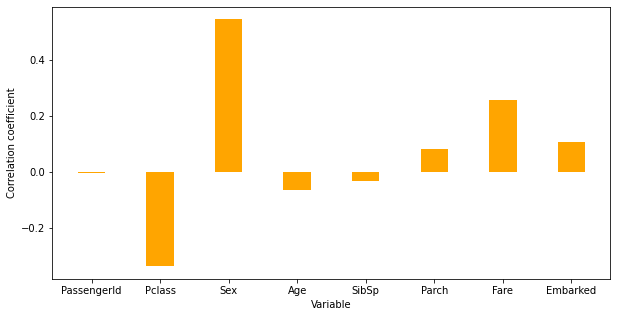

In [ ]:
data = {'PassengerId' :Data['Survived'].corr(Data['PassengerId']),
'Pclass' :Data['Survived'].corr(Data['Pclass']),
'Sex' :Data['Survived'].corr(Data['Sex']),
'Age' :Data['Survived'].corr(Data['Age']),
'SibSp' :Data['Survived'].corr(Data['SibSp']),
'Parch' :Data['Survived'].corr(Data['Parch']),
'Fare' :Data['Survived'].corr(Data['Fare']),
'Embarked' :Data['Survived'].corr(Data['Embarked'])
}

fig = plt.figure(figsize = (10, 5))
plt.bar(list(data.keys()), list(data.values()), color ='orange', width = 0.4)
plt.xlabel('Variable')
plt.ylabel('Correlation coefficient')
plt.show()

확인해보니 Pclass, Sex, Fare가 가장 높네요\
그러면 나머지 특성은 제외한 이 세가지 특성을 모델에 학습시켜야겠어요\
세가지 특성을 제외한 나머지는 없애줍시다



---
참고

Pclass: 좌석의 클래스, 1st: 1, 2nd: 2, 3rd: 3\
Sex: 성별, 남성: 0, 여성: 1\
Fare: 지불한 요금

In [ ]:
Data = Data.drop(columns=['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
Data.set_index('PassengerId',inplace = True)
Data.head()

,Survived,Pclass,Sex,Fare
PassengerId,,,,
1,0,3,0,7.2500
2,1,1,1,71.2833
3,1,3,1,7.9250
4,1,1,1,53.1000
5,0,3,0,8.0500



이제 본격적으로 모델에 학습시킬 데이터를 준비해봅시다\
먼저 train set과 test set은 대략 3대1로 나눠주죠



In [ ]:
trainData = Data[:600]
testData = Data[600:]

In [ ]:
trainData.head()

,Survived,Pclass,Sex,Fare
PassengerId,,,,
1,0,3,0,7.2500
2,1,1,1,71.2833
3,1,3,1,7.9250
4,1,1,1,53.1000
5,0,3,0,8.0500


In [ ]:
testData.head()

,Survived,Pclass,Sex,Fare
PassengerId,,,,
601,1,2,1,27.0000
602,0,3,0,7.8958
603,0,1,0,42.4000
604,0,3,0,8.0500
605,1,1,0,26.5500


In [ ]:
yTrain = trainData.Survived.to_numpy()
trainData = trainData.drop(columns=['Survived'])
xTrain = trainData.to_numpy()
(xTrain.shape, yTrain.shape)

((600, 3), (600,))

In [ ]:
yTest = testData.Survived.to_numpy()
testData = testData.drop(columns=['Survived'])
xTest = testData.to_numpy()
(xTest.shape, yTest.shape)

((291, 3), (291,))

데이터가 준비됐으니 드디어 모델에 학습시킬 차례네요!\
교재를 참고해서 모델을 학습시켜봅시디!\
*단 optimizer는 adam으로

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=3, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xTrain, yTrain, epochs=256, shuffle=True, verbose=0)

In [ ]:
preds = model.predict(xTest)

10/10 [==============================] - 0s 4ms/step


In [ ]:
score = model.evaluate(xTest,yTest)

10/10 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7766


음 이 정도 정확도면 조금 아쉽긴하지만 나쁘진 않네요!\
그럼 종현이는 과연 살아남았을지 확인해볼까요?\
여러분도 상황을 가정해서 생존했을지 확인해보세요!

---

Pclass: 좌석의 클래스, 1st: 1, 2nd: 2, 3rd: 3\
Sex: 성별, 남성: 0, 여성: 1\
Fare: 지불한 요금


In [ ]:
#내가 탔을 때를 가정한 조건
JongHyun = [2, 0, 30.5789]
pred = model.predict([JongHyun])

if(pred[0] <= 0.5):
    print('AI : 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : 생존하실 것으로 예측됩니다.\n')

1/1 [==============================] - 0s 84ms/step
AI : 사망하실 것으로 예측됩니다.



안타깝게도 종현이는 살아남지 못했네요..\
그 날 종현이는 눈물로 밤을 지새웠답니다.

**수고하셨습니다!**